<a href="https://colab.research.google.com/github/gyeongdong13/Study/blob/main/image_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

In [ ]:
np.random.seed(100)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# 데이터 전처리
X_train = X_train.reshape(50000,3072)
X_test = X_test.reshape(10000,3072)

X_train = (X_train-np.mean(X_train)) / np.std(X_train)
X_test = (X_test-np.mean(X_test)) / np.std(X_test)

In [ ]:
labels = 10
Y_train = np_utils.to_categorical(y_train, labels)
Y_test = np_utils.to_categorical(y_test, labels)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()

# fist layer
model.add(Dense(512, input_shape=(3072,)))
model.add(Activation("relu"))
model.add(Dropout(0.4))

# second layer
model.add(Dense(120))
model.add(Activation("relu"))
model.add(Dropout(0.2))

# third layer
model.add(Dense(labels))
model.add(Activation("sigmoid"))


In [ ]:
adam = Adam(0.01)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, batch_size=1000, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
50/50 [==============================] - 11s 215ms/step - loss: 5.0111 - accuracy: 0.1068 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
50/50 [==============================] - 14s 269ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
50/50 [==============================] - 9s 189ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
50/50 [==============================] - 10s 205ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
50/50 [==============================] - 11s 219ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
50/50 [==============================] - 8s 164ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
50/50 [==============================] - 7s 140ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Ep

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Loss = ",score[0], "Test Accuracy(정답률):", score[1]*100)

Loss =  2.3026225566864014 Test Accuracy(정답률): 10.000000149011612


In [ ]:
y_prob = model.predict(X_test, verbose=0)
predicted = y_prob.argmax(axis=-1)

In [ ]:
y_prob

array([[0.4994513 , 0.5061472 , 0.4999765 , ..., 0.50065166, 0.5050784 ,
        0.504026  ],
       [0.4994513 , 0.5061472 , 0.4999765 , ..., 0.50065166, 0.5050784 ,
        0.504026  ],
       [0.4994513 , 0.5061472 , 0.4999765 , ..., 0.50065166, 0.5050784 ,
        0.504026  ],
       ...,
       [0.4994513 , 0.5061472 , 0.4999765 , ..., 0.50065166, 0.5050784 ,
        0.504026  ],
       [0.4994513 , 0.5061472 , 0.4999765 , ..., 0.50065166, 0.5050784 ,
        0.504026  ],
       [0.4994513 , 0.5061472 , 0.4999765 , ..., 0.50065166, 0.5050784 ,
        0.504026  ]], dtype=float32)

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

x_train = X_train.reshape(60000,784).astype("float32")
x_test = X_test.reshape(10000,784).astype("float32")

nb_classes=10

y_train_one_hot = tf.one_hot(Y_train,nb_classes).numpy()
y_test_one_hot = tf.one_hot(Y_test,nb_classes).numpy()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
y_test_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
W = tf.Variable(tf.random.normal([784, nb_classes]), name="weight")
B = tf.Variable(tf.random.normal([nb_classes]), name="bias")

def Hypothesis(X) :
  logits = tf.add(tf.matmul(tf.cast(X, tf.float32), W), B)
  return tf.nn.softmax(logits)

def loss(H,Y) :
  entropy = -tf.reduce_sum(Y * tf.math.log(H), axis=1)
  cost = tf.reduce_mean(entropy)
  return cost

In [ ]:
def train(X,Y,learning_rate=0.1) :
  with tf.GradientTape() as tape :
    _loss = loss(Hypothesis(X),Y)
  _w, _b = tape.gradient(_loss, [W,B])
  W.assign_sub(learning_rate*_w)
  B.assign_sub(learning_rate*_b)

def evaluation(H,Y) :
  prediction = tf.argmax(H,1)
  correct_prediction = tf.equal(prediction, tf.argmax(Y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  return prediction, accuracy

In [ ]:
training_epochs = 50
batch_size = 100

for epoch in range(training_epochs) :
  avg_cost=0
  iterations = int(len(x_train) / batch_size)

  idx = 0
  for i in range(iterations) :
    batch_xs, batch_ys = x_train[idx:idx+batch_size, :], y_train_one_hot[idx:idx+batch_size,:]
    _c = loss(Hypothesis(batch_xs), batch_ys)
    train(batch_xs, batch_ys, learning_rate=0.15)
    avg_cost = _c / iterations
    idx += batch_size
  print("Epoch: {:2d} loss : {}".format(epoch+1, avg_cost))

print("\nAccuracy...")
_h = Hypothesis(x_test)
_p,_a = evaluation(_h,y_test_one_hot)
print("\nAccuracy =", _a.numpy())

Epoch:  1 loss : 0.0021838454995304346
Epoch:  2 loss : 0.001686281175352633
Epoch:  3 loss : 0.0015150463441386819
Epoch:  4 loss : 0.0014188530622050166
Epoch:  5 loss : 0.0013529566349461675
Epoch:  6 loss : 0.001301746815443039
Epoch:  7 loss : 0.0012582753552123904
Epoch:  8 loss : 0.0012194592272862792
Epoch:  9 loss : 0.0011839063372462988
Epoch: 10 loss : 0.00115099991671741
Epoch: 11 loss : 0.0011204448528587818
Epoch: 12 loss : 0.0010920402128249407
Epoch: 13 loss : 0.0010656067170202732
Epoch: 14 loss : 0.0010409671813249588
Epoch: 15 loss : 0.0010179501259699464
Epoch: 16 loss : 0.0009963935008272529
Epoch: 17 loss : 0.0009761512046679854
Epoch: 18 loss : 0.0009570926195010543
Epoch: 19 loss : 0.0009391027851961553
Epoch: 20 loss : 0.000922083156183362
Epoch: 21 loss : 0.0009059479925781488
Epoch: 22 loss : 0.0008906232542358339
Epoch: 23 loss : 0.0008760442142374814
Epoch: 24 loss : 0.0008621542365290225
Epoch: 25 loss : 0.0008489039610140026
Epoch: 26 loss : 0.00083624961

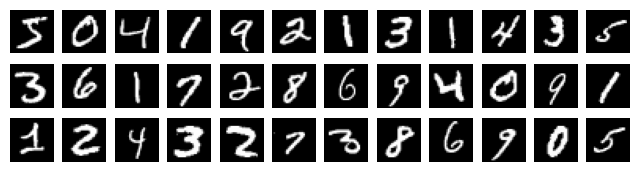

(60000, 28, 28) float64
(60000,) uint8
(10000, 28, 28) float64
(10000,) uint8


In [ ]:
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

plt.figure(figsize=(8,2))
for i in range(36) :
  plt.subplot(3,12,i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.axis("off")
plt.show()

print(X_train.shape, X_train.dtype)
print(Y_train.shape, Y_train.dtype)
print(X_test.shape, X_test.dtype)
print(Y_test.shape, Y_test.dtype)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10,input_dim=784,activation="softmax")])

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), verbose=2, batch_size=100, epochs=15, use_multiprocessing=True)

model.evaluate(X_test, Y_test, verbose=2, batch_size=100, use_multiprocessing=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
600/600 - 3s - loss: 0.6315 - accuracy: 0.8399 - val_loss: 0.3636 - val_accuracy: 0.9041 - 3s/epoch - 4ms/step
Epoch 2/15
600/600 - 1s - loss: 0.3477 - accuracy: 0.9054 - val_loss: 0.3098 - val_accuracy: 0.9137 - 1s/epoch - 2ms/step
Epoch 3/15
600/600 - 2s - loss: 0.3105 - accuracy: 0.9147 - val_loss: 0.2905 - val_accuracy: 0.9193 - 2s/epoch - 3ms/step
Epoch 4/15
600/600 - 2s - loss: 0.2930 - accuracy: 0.9186 - val_loss: 0.2811 - val

[0.2624502182006836, 0.9276999831199646]

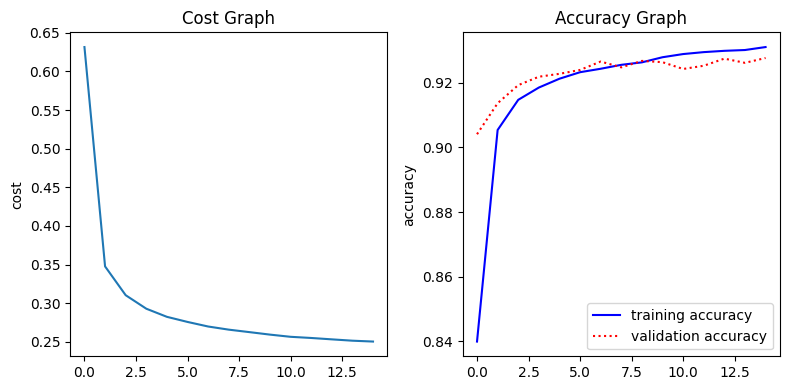

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history["loss"])
plt.title("Cost Graph")
plt.ylabel("cost")
plt.subplot(1,2,2)
plt.title("Accuracy Graph")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], "b-", label="training accuracy")
plt.plot(hist.history["val_accuracy"], "r:", label="validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 49ms/step

Prediction Result:
[[1.8118518e-06 6.5867732e-12 5.2060523e-06 3.8089531e-03 2.4267686e-07
  1.8444811e-05 1.3094523e-10 9.9585706e-01 1.4603186e-05 2.9368565e-04]]
Predicted class: [7]


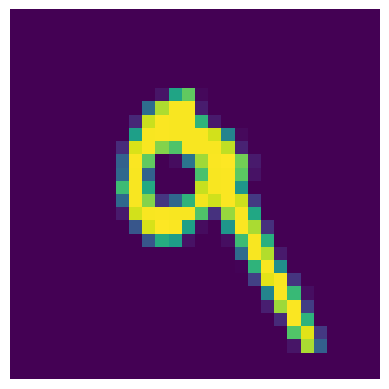

In [ ]:
prediction = model.predict(X_test[:1,:])
prediction_class = tf.argmax(prediction,1)
print(f"\nPrediction Result:\n{prediction}")
print(f"Predicted class:", prediction_class.numpy())

plt.imshow(X_test[prediction_class[0]])
plt.grid(False)
plt.axis("off")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), tf.keras.layers.Dense(10,input_dim=784,activation="softmax")])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), verbose=2, batch_size=100, epochs=15, use_multiprocessing=True)
model.evaluate(X_test, Y_test, verbose=2, batch_size=100, use_multiprocessing=True)

# 모델을 HDF5 파일로 저장
file_name = "softmax_mnist_model.h5"
model.save(file_name)
print("\nThis model has been saved to {file_name}.")

Epoch 1/15
600/600 - 3s - loss: 0.6162 - accuracy: 0.8486 - val_loss: 0.3609 - val_accuracy: 0.9047 - 3s/epoch - 5ms/step
Epoch 2/15
600/600 - 1s - loss: 0.3453 - accuracy: 0.9062 - val_loss: 0.3082 - val_accuracy: 0.9159 - 1s/epoch - 2ms/step
Epoch 3/15
600/600 - 1s - loss: 0.3091 - accuracy: 0.9143 - val_loss: 0.2905 - val_accuracy: 0.9196 - 1s/epoch - 2ms/step
Epoch 4/15
600/600 - 1s - loss: 0.2920 - accuracy: 0.9194 - val_loss: 0.2809 - val_accuracy: 0.9218 - 1s/epoch - 2ms/step
Epoch 5/15
600/600 - 1s - loss: 0.2823 - accuracy: 0.9219 - val_loss: 0.2759 - val_accuracy: 0.9224 - 1s/epoch - 2ms/step
Epoch 6/15
600/600 - 1s - loss: 0.2748 - accuracy: 0.9239 - val_loss: 0.2730 - val_accuracy: 0.9251 - 1s/epoch - 2ms/step
Epoch 7/15
600/600 - 1s - loss: 0.2697 - accuracy: 0.9248 - val_loss: 0.2694 - val_accuracy: 0.9264 - 1s/epoch - 2ms/step
Epoch 8/15
600/600 - 1s - loss: 0.2654 - accuracy: 0.9259 - val_loss: 0.2653 - val_accuracy: 0.9265 - 1s/epoch - 2ms/step
Epoch 9/15
600/600 - 1s 

In [ ]:
file_name = "softmax_mnist_model.h5"
model=tf.keras.models.load_model(file_name)
print(f"\n This model has been loaded from {file_name}.")

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), verbose=2, batch_size=100, epochs=15, use_multiprocessing=True)
model.evaluate(X_test, Y_test, verbose=2, batch_size=100, use_multiprocessing=True)


 This model has been loaded from softmax_mnist_model.h5.
Epoch 1/15
600/600 - 2s - loss: 0.2487 - accuracy: 0.9314 - val_loss: 0.2625 - val_accuracy: 0.9290 - 2s/epoch - 4ms/step
Epoch 2/15
600/600 - 1s - loss: 0.2471 - accuracy: 0.9319 - val_loss: 0.2628 - val_accuracy: 0.9285 - 1s/epoch - 2ms/step
Epoch 3/15
600/600 - 1s - loss: 0.2461 - accuracy: 0.9326 - val_loss: 0.2626 - val_accuracy: 0.9286 - 1s/epoch - 2ms/step
Epoch 4/15
600/600 - 1s - loss: 0.2452 - accuracy: 0.9328 - val_loss: 0.2612 - val_accuracy: 0.9274 - 1s/epoch - 2ms/step
Epoch 5/15
600/600 - 1s - loss: 0.2443 - accuracy: 0.9324 - val_loss: 0.2633 - val_accuracy: 0.9277 - 1s/epoch - 2ms/step
Epoch 6/15
600/600 - 1s - loss: 0.2431 - accuracy: 0.9334 - val_loss: 0.2674 - val_accuracy: 0.9246 - 1s/epoch - 2ms/step
Epoch 7/15
600/600 - 1s - loss: 0.2422 - accuracy: 0.9333 - val_loss: 0.2668 - val_accuracy: 0.9264 - 1s/epoch - 2ms/step
Epoch 8/15
600/600 - 1s - loss: 0.2415 - accuracy: 0.9338 - val_loss: 0.2636 - val_accur

[0.2649843692779541, 0.9283000230789185]

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()
hist = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), verbose=2, batch_size=100, epochs=15, use_multiprocessing=True)
model.evaluate(X_test, Y_test, verbose=2, batch_size=100, use_multiprocessing=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_4 (Dropout)         (None, 1024)             

[0.07678928226232529, 0.9836000204086304]

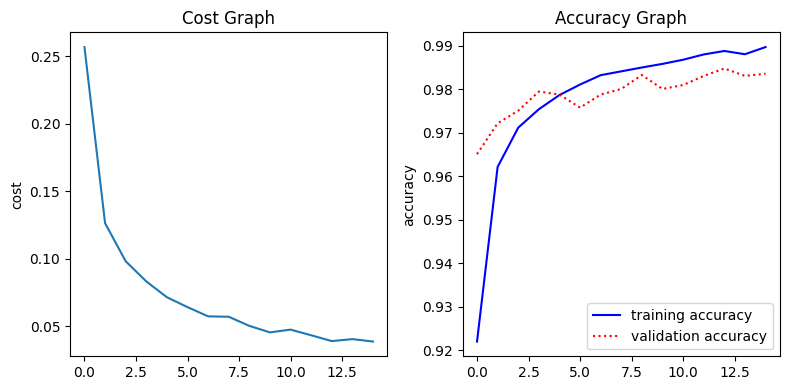

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history["loss"])
plt.title("Cost Graph")
plt.ylabel("cost")
plt.subplot(1,2,2)
plt.title("Accuracy Graph")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], "b-", label="training accuracy")
plt.plot(hist.history["val_accuracy"], "r:", label="validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()

image.shape = (1, 3, 3, 1)
image.reshaped.shape = (3, 3)
image.reshaped:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


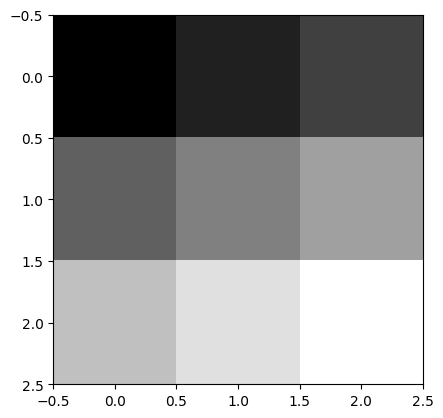

In [ ]:
import os
import random
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)

print("image.shape =", image.shape)
print("image.reshaped.shape =", image.reshape(3,3).shape)
print("image.reshaped:\n", image.reshape(3,3), sep="")
plt.imshow(image.reshape(3,3), cmap="gray")

In [ ]:
weight = tf.constant([[[[1.0]], [[1.0]]],
                      [[[1.0]], [[1.0]]]])
print("weight.shape =", weight.shape)
weight_init = tf.constant_initializer(weight.numpy())
weight_img = tf.reshape(weight, (2,2))
print("weight.reshaped.shape =", weight_img.shape)
print("weight.reshaped:\n", weight_img.numpy(), sep='')

weight.shape = (2, 2, 1, 1)
weight.reshaped.shape = (2, 2)
weight.reshaped:
[[1. 1.]
 [1. 1.]]


In [ ]:
weight = tf.constant([[[[1.0,10.0,-1.0]], [[1.0,10.0,-1.0]]],
                      [[[1.0,10.0,-1.0]], [[1.0,10.0,-1.0]]]])
weight_img = weight.numpy()
print("weight.shape =", weight.shape)
weight_init = tf.constant_initializer(weight.numpy())
weight_img = np.swapaxes(weight_img, 0,3)

for i, one_img in enumerate(weight_img) :
  print(one_img.reshape(2,2))

weight.shape = (2, 2, 1, 3)
[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[-1. -1.]
 [-1. -1.]]


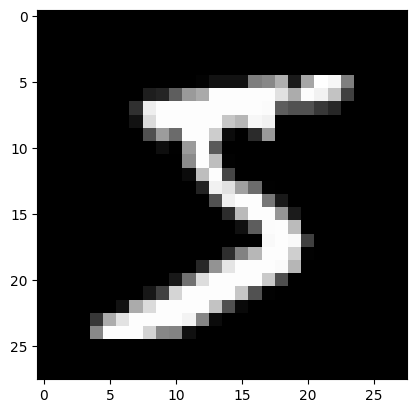

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

img = X_train[0]
plt.imshow(img, cmap="gray")
plt.show()

conv2d.shape = (1, 14, 14, 5)


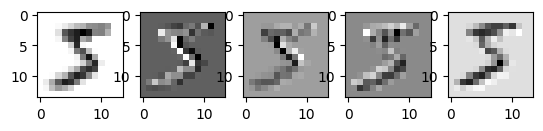

In [ ]:
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2,2), padding="SAME", kernel_initializer=weight_init)(img)
print(f"conv2d.shape = {conv2d.shape}")
images = np.swapaxes(conv2d, 0, 3)
for i, image in enumerate(images) :
  plt.subplot(1,5,i+1)
  plt.imshow(image.reshape(14,14), cmap="gray")
plt.show()

pool.shape = (1, 7, 7, 5)


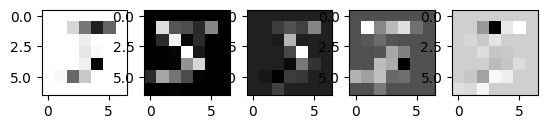

In [ ]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="SAME")(conv2d)
print(f"pool.shape = {pool.shape}")
images = np.swapaxes(pool, 0, 3)
for i, image in enumerate(images) :
  plt.subplot(1,5,i+1)
  plt.imshow(image.reshape(7,7), cmap="gray")

plt.show()

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding="same",activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64,(3,3),strides=(1,1), padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128,(3,3), padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()
hist = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), verbose=2, batch_size=100, epochs=5, use_multiprocessing=True)
model.evaluate(X_test, Y_test, verbose=2, batch_size=100, use_multiprocessing=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)         

[0.023404784500598907, 0.9919999837875366]